In [9]:
"""Paths and patches"""

from matplotlib.patches import PathPatch
from matplotlib.path import Path
from numpy import asarray, concatenate, ones
import seaborn as sns


def PolygonPath(polygon):
    """Constructs a compound matplotlib path from a Shapely or GeoJSON-like
    geometric object"""
    #this = Polygon(polygon)
    this = polygon
    assert this.geom_type == 'Polygon'
    def coding(ob):
        # The codes will be all "LINETO" commands, except for "MOVETO"s at the
        # beginning of each subpath
        n = len(getattr(ob, 'coords', None) or ob)
        vals = ones(n, dtype=Path.code_type) * Path.LINETO
        vals[0] = Path.MOVETO
        return vals
    vertices = concatenate(
                    [asarray(this.exterior.coords)[:, :2]] 
                    + [asarray(r.coords)[:, :2] for r in this.interiors])
    codes = concatenate(
                [coding(this.exterior)] 
                + [coding(r) for r in this.interiors])
    return Path(vertices, codes)


def PolygonPatch(polygon, **kwargs):
    """Constructs a matplotlib patch from a geometric object
    
    The `polygon` may be a Shapely or GeoJSON-like object with or without holes.
    The `kwargs` are those supported by the matplotlib.patches.Polygon class
    constructor. Returns an instance of matplotlib.patches.PathPatch.

    Example (using Shapely Point and a matplotlib axes):

      >>> b = Point(0, 0).buffer(1.0)
      >>> patch = PolygonPatch(b, fc='blue', ec='blue', alpha=0.5)
      >>> axis.add_patch(patch)

    """
    
    return PathPatch(PolygonPath(polygon), **kwargs)

def addPolygonPatch(ax, polygon, **kwargs):
    print(polygon.geom_type)
    if polygon.geom_type == 'Polygon':
        ax.add_patch(PolygonPatch(polygon, **kwargs))
    elif polygon.geom_type == 'MultiPolygon':
        #return
        for geom in polygon.geoms:
            #print(geom)
            ax.add_patch(PolygonPatch(geom, **kwargs))
            break
    


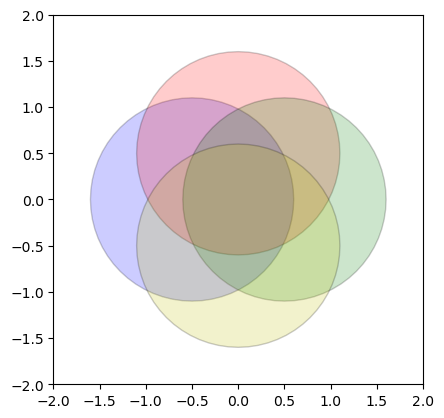

In [3]:
import shapely.geometry as sg
import matplotlib.pyplot as plt
#import descartes
radius = 1.1
# create the circles with shapely
Rcircle = sg.Point(-0.5,0).buffer(radius)
Ecircle = sg.Point(0.5,0).buffer(radius)
Ocircle = sg.Point(0, -0.5).buffer(radius)
Mcircle = sg.Point(0, 0.5).buffer(radius)

# compute the 3 parts

# left = a.difference(b)
# right = b.difference(a)
# middle = a.intersection(b)

# = a.difference(b)
# use descartes to create the matplotlib patches
ax = plt.gca()
ax.add_patch(PolygonPatch(Rcircle, fc='b', ec='k', alpha=0.2))
ax.add_patch(PolygonPatch(Mcircle, fc='r', ec='k', alpha=0.2))
ax.add_patch(PolygonPatch(Ecircle, fc='g', ec='k', alpha=0.2))
ax.add_patch(PolygonPatch(Ocircle, fc='y', ec='k', alpha=0.2))

# control display
ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
ax.set_aspect('equal')
plt.show()

In [4]:
def get_sliver(circles_list, sliver_membership):
    sliver_membership = list (sliver_membership)
    # get a circle to start with
    for first_circle, member in zip (circles_list, sliver_membership):
        if member:
            break
    final_sliver = first_circle
    for circle, member in zip (circles_list, sliver_membership):
        #if (circle != first_circle) and final_sliver.intersects(circle):
        if member:
            final_sliver = final_sliver.intersection(circle)
        else:
            final_sliver = final_sliver.difference(circle)
    #print(sliver_membership, final_sliver)
    return final_sliver

    
        

In [5]:
from shapely.geometry import Point
from shapely.affinity import scale, rotate
def create_ellipse(x, y, w, h, inclination):
    p = Point(x,y)
    c = p.buffer(1)
    ellipse = scale(c, w, h, origin='centroid')
    ellipse = rotate(ellipse, inclination)
    return ellipse

#Create two ellipses:
    # def draw_ellipse(fig, ax, x, y, w, h, a, fillcolor):



In [6]:
def draw_text(fig, ax, x, y, text, color=[0, 0, 0, 1], fontsize=14, ha="center", va="center"):
    ax.text(
        x, y, text,
        horizontalalignment=ha,
        verticalalignment=va,
        fontsize=fontsize,
        color="black")

In [10]:
sns.set_style('whitegrid')

MultiPolygon
MultiPolygon
MultiPolygon
MultiPolygon
Polygon
Polygon
Polygon
MultiPolygon
Polygon
Polygon
Polygon
MultiPolygon
Polygon
Polygon
Polygon


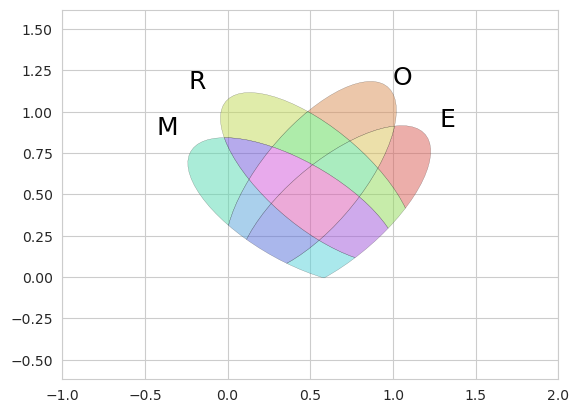

In [11]:
import shapely.geometry as sg
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
fontsize=18
fig = plt.figure(0) # , figsize=figsize, dpi=dpi)
ax = fig.add_subplot(111, aspect='equal', adjustable='datalim')
#ax.set_axis_off()
ax.set_ylim(bottom=-1, top=2)
ax.set_xlim(left=-1, right=2)

#import descartes
radius = 1.1
# create the circles with shapely
# Rcircle = sg.Point(-0.5,0).buffer(radius)
# Ecircle = sg.Point(0.5,0).buffer(radius)
# Ocircle = sg.Point(0, -0.5).buffer(radius)
# Mcircle = sg.Point(0, 0.5).buffer(radius)
# circles_list = [Ecircle, Rcircle, Mcircle, Ocircle]
circles_list = [
    create_ellipse(0.400, 0.400, 0.72, 0.3, 150.0),
    create_ellipse(0.540, 0.600, 0.72, 0.3, 140.0),
    create_ellipse(0.504, 0.600, 0.72, 0.3, 50.0),
    create_ellipse(0.644, 0.400, 0.72, 0.3, 40.0),
]

slivers = [get_sliver(circles_list, i) for i in product([0,1], repeat=4) if i != (0,0,0,0)]
           
# = a.difference(b)
# use descartes to create the matplotlib patches
ax = plt.gca()
# ax.add_patch(PolygonPatch(Rcircle, fc='b', ec='k', alpha=0.2))
# ax.add_patch(PolygonPatch(Mcircle, fc='r', ec='k', alpha=0.2))
# ax.add_patch(PolygonPatch(Ecircle, fc='g', ec='k', alpha=0.2))
# ax.add_patch(PolygonPatch(Ocircle, fc='y', ec='k', alpha=0.2))
# ax.add_patch(PolygonPatch(sliver, fc='purple', ec='k', alpha=1))
palette = sns.color_palette('hls', n_colors=16)
for sliver, c in zip(slivers, palette):
    #print (sliver, c)
    addPolygonPatch(ax, sliver, fc=c, ec='k', lw=0.2, alpha=0.5)
    #break
names = 'RMEO'
colors = 'ybgr'
draw_text(fig, ax, -0.13, 1.18, names[0], colors[0], fontsize=fontsize, ha="right")
draw_text(fig, ax, -0.3, 0.83, names[1], colors[1], fontsize=fontsize, ha="right", va="bottom")
draw_text(fig, ax, 1.28, 0.88, names[2], colors[2], fontsize=fontsize, ha="left", va="bottom")
draw_text(fig, ax, 1.0, 1.28, names[3], colors[3], fontsize=fontsize, ha="left", va="top")
    
# for sliver, c in zip(circles_list, palette):
#     #print (sliver, c)
#     #ax.add_patch(PolygonPatch(sliver, fc=c, ec='k', alpha=0.3))

#     addPolygonPatch(ax, sliver, fc=c, ec='k', alpha=0.2)

# control display
#ax.set_xlim(-2, 2); ax.set_ylim(-2, 2)
ax.set_aspect('equal')
plt.show()

In [14]:
Rcircle.centroid.coords.xy[0][0]


-0.5